In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import healpy as hp
import cosmohmc.almncl.utils as utils
import cosmohmc.almncl.sampler as sampler
import matplotlib.pyplot as plt # For plotting

In [2]:
elmax = 10
nside = 16
el = np.arange(elmax+1)
Cl_th = 3*np.ones(elmax+1)
Cl_th[0:2] = 0

Text(0, 0.5, '$C_\\ell$')

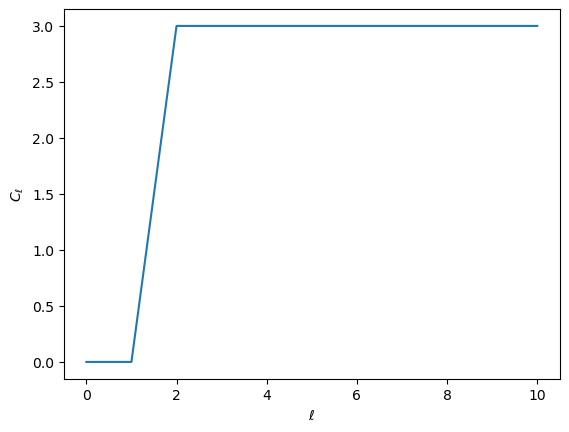

In [3]:
plt.plot(el, Cl_th, label='Theory')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')

In [4]:
# Noise power spectrum
Nl = 0.01*np.ones(elmax+1)
Nl[0:2] = 0

In [5]:
#generate a signal realization for the given Cl; real space map and its harmonic coefficients
map_sig, alm_sig = hp.synfast(cls = Cl_th, nside = nside, lmax=elmax, mmax=elmax, alm=True,
    pol=False, pixwin=False, fwhm=0.0, sigma=None, new=False, verbose=True)

In [6]:
map_Cl = hp.anafast(map_sig, lmax=elmax, mmax = elmax, alm=False, pol=False)

In [7]:
#generate a noise realization, map as well as alms
map_noise, alm_noise = hp.synfast(cls = Nl, nside = nside, lmax=elmax, mmax=elmax, alm=True,
    pol=False, pixwin=False, fwhm=0.0, sigma=None, new=False, verbose=True)

In [8]:
#compute power spectra of noise realization
noise_Nl = hp.anafast(map_noise, lmax=elmax, mmax = elmax, alm=False, pol=False)

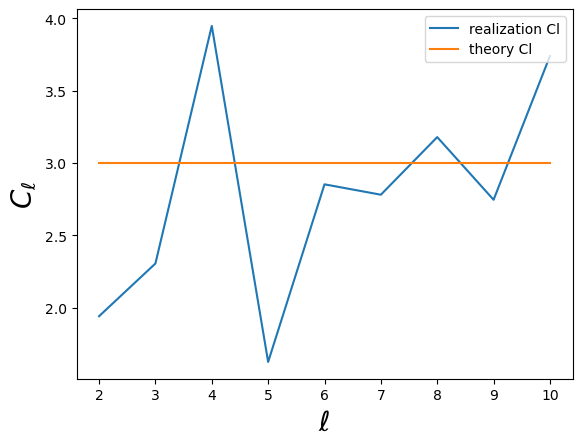

In [9]:
#compare theory and realization angular power spectrum
plt.plot(el[2:], map_Cl[2:], label = 'realization Cl')
plt.plot(el[2:], Cl_th[2:], label = 'theory Cl')
plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylabel(r'$C_{\ell}$', fontsize = 20)
plt.legend(loc = 'upper right')

In [10]:
#combine signal realisation and noise realization to get a 'data' realization
#in real space
map_data = map_sig + map_noise
#in harmonic space
alm_data = alm_sig + alm_noise

In [11]:
map_data  = hp.alm2map(alm_data, nside = nside, lmax = elmax, mmax = elmax, pol=False)
alm_data1 = hp.map2alm(map_data, lmax = elmax, mmax = elmax)

In [12]:
alm_data1 = hp.map2alm(map_data, lmax = elmax, mmax = elmax)

In [13]:
alm_data[45], alm_data1[45]

((-1.9326555471955673-0.7312935541860014j),
 (-1.9326555471954783-0.7312935541857932j))

In [14]:
#compare signal and noise standard deviation
np.std(map_sig), np.std(map_noise)

(5.223225701676513, 0.28358453583371873)

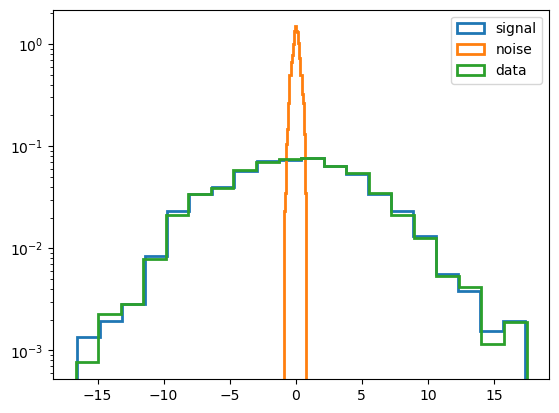

In [15]:
#compare data, signal and noise distribution
plt.hist(map_sig, histtype='step', bins=20, label = 'signal', density=True, lw = 2.0)
plt.hist(map_noise, histtype='step', bins=20, label = 'noise', density=True, lw = 2.0)
plt.hist(map_data, histtype='step', bins=20, label = 'data', density=True, lw = 2.0)
plt.legend(loc = 'upper right')
plt.yscale('log')

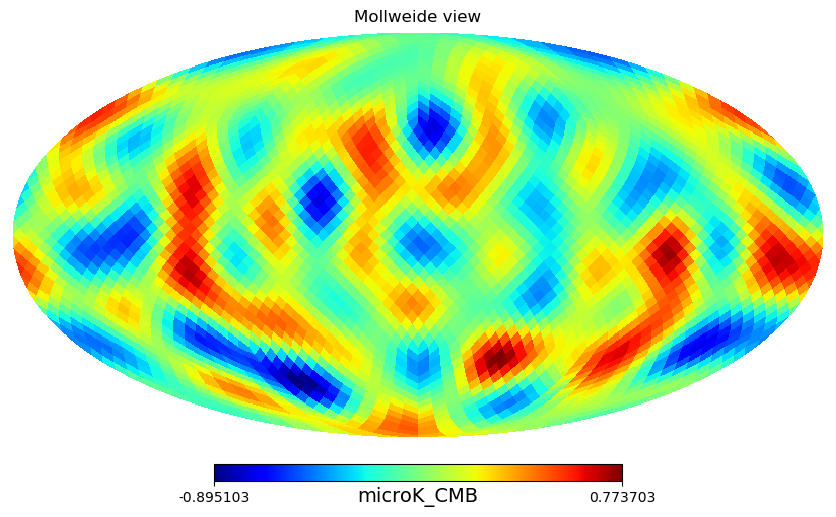

In [16]:
hp.mollview(map= map_noise,
            fig=None,
            rot=None, 
            coord=None, 
            unit=r'microK_CMB', 
            min=None, 
            max=None, 
            cbar=True, 
            cmap=plt.cm.jet, 
            notext=False, 
            norm=None, 
            hold=False, 
            margins=None, 
            sub=None, 
            return_projected_map=False)
#hp.graticule(dpar=30, dmer = 30, coord = 'G')
#plt.savefig('map_beta10_value10_lmax512_nside512_newbps_2nd.png')

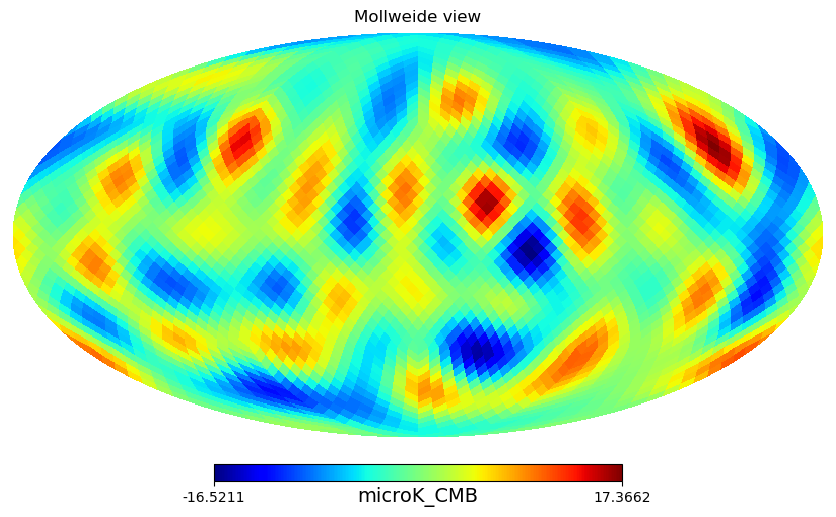

In [17]:
hp.mollview(map= map_sig,
            fig=None,
            rot=None, 
            coord=None, 
            unit=r'microK_CMB', 
            min=None, 
            max=None, 
            cbar=True, 
            cmap=plt.cm.jet, 
            notext=False, 
            norm=None, 
            hold=False, 
            margins=None, 
            sub=None, 
            return_projected_map=False)
#hp.graticule(dpar=30, dmer = 30, coord = 'G')
#plt.savefig('map_beta10_value10_lmax512_nside512_newbps_2nd.png')

In [18]:
#compute data angular power spectrum
data_cl = hp.alm2cl(alms1 = alm_data, alms2=None, lmax=elmax, mmax=elmax, lmax_out=elmax,nspec=None)

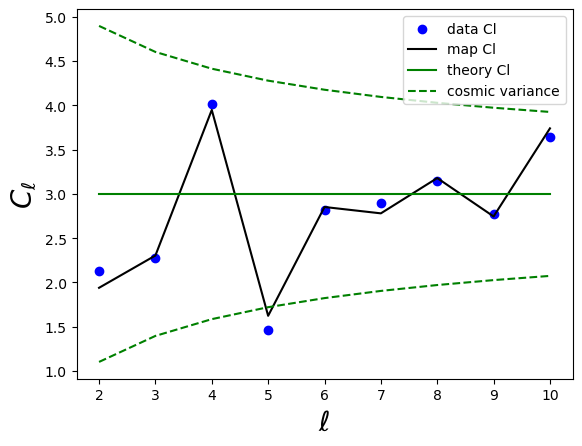

In [19]:
plt.scatter(el[2:], data_cl[2:], color = 'b', label = 'data Cl')
plt.plot(el[2:], map_Cl[2:], 'k', label = 'map Cl')
plt.plot(el[2:], Cl_th[2:], 'g', label = 'theory Cl')
plt.plot(el[2:], Cl_th[2:] + np.sqrt(2)*Cl_th[2:]/np.sqrt(2*el[2:]+1), color = 'g', 
         ls = '--', label = 'cosmic variance')
plt.plot(el[2:], Cl_th[2:] - np.sqrt(2)*Cl_th[2:]/np.sqrt(2*el[2:]+1), color = 'g', 
         ls = '--')
plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylabel(r'$C_{\ell}$', fontsize = 20)
plt.legend(loc = 'upper right')

In [35]:
hmc_sampler = sampler.almnclsampler(data = map_data, elmax=elmax, nside=nside, Cl=Cl_th, Nl=Nl, step_size=0.1, n_steps=10, n_samples=1000)

In [36]:
sample_q_cl, sample_q_almr, sample_q_almi, dH_array = hmc_sampler.HMCsample()

Sampling (HMC): 100%|██████████| 1000/1000 [00:34<00:00, 29.23it/s]


In [33]:
sample_q_cl.shape

(1000, 11)

In [37]:
hmc_sampler.acceptance_rate

0.0

In [38]:
dH_array

[37.09496885342068,
 31.10924340418498,
 27.717177787987566,
 36.80710225697922,
 26.444750163959128,
 52.89691675488592,
 30.78472277318889,
 42.10680856976933,
 28.306813648288767,
 39.155570969865806,
 33.30792908522898,
 35.01672016618488,
 39.03540193463081,
 45.138278119129524,
 33.972769916444236,
 33.99188152272944,
 50.28117760286261,
 39.5506877931457,
 30.914567544006246,
 32.06633021558622,
 29.476114610605407,
 43.59072137562339,
 34.382656805791726,
 38.9425279329312,
 44.64898386479507,
 30.946150873248,
 30.059662900351384,
 24.173337048685795,
 34.7613246868097,
 38.66173056545372,
 29.052125128082736,
 30.97890654444629,
 31.09407032767308,
 34.19847464375303,
 30.476311404096492,
 37.37353718289074,
 32.65462842623796,
 38.547410342657486,
 41.64923402568215,
 35.90564889177915,
 26.149571640513017,
 34.23290842116978,
 31.306676615816855,
 28.589626739710155,
 33.36553490804559,
 28.881347731676897,
 39.11456433677,
 36.21448335586632,
 38.03103921350652,
 25.723162

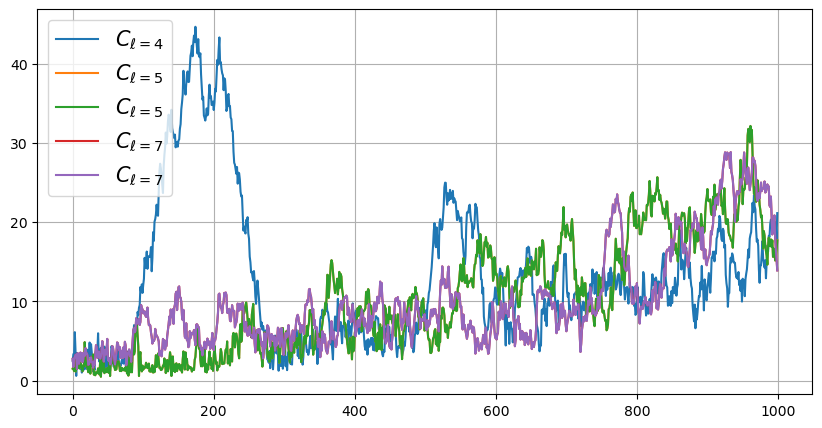

In [35]:
#check some Cl chains
index = np.random.uniform(2, 10, 5)
plt.figure(figsize = (10, 5))
for j in np.sort(index): #np.arange(2, index, 1):
    i = int(j)
    plt.plot(sample_q_cl[:,i], label = r'$C_{\ell = %d}$' %(i))
plt.legend(loc = 'upper left', fontsize = 15)
plt.grid()